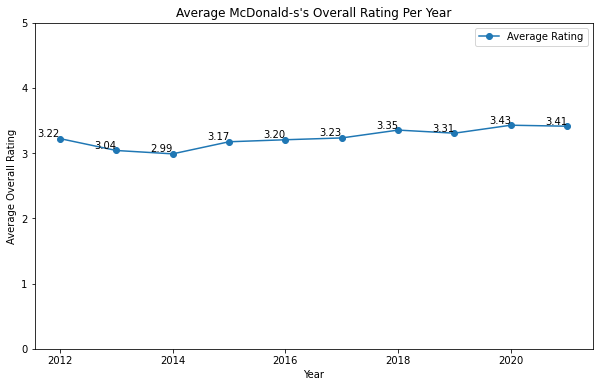

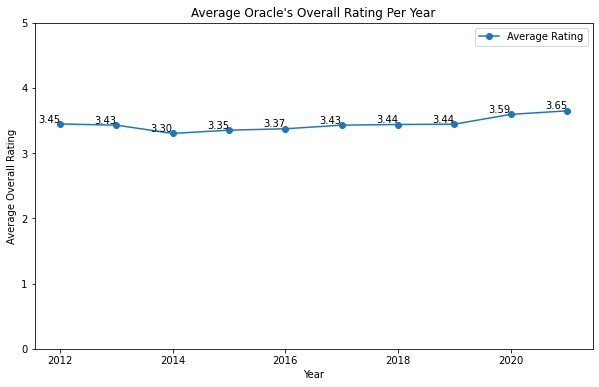

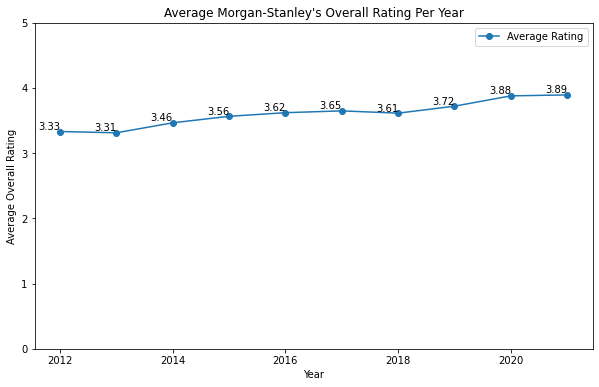

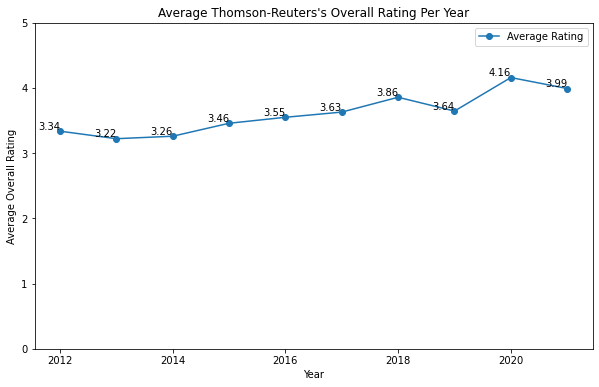

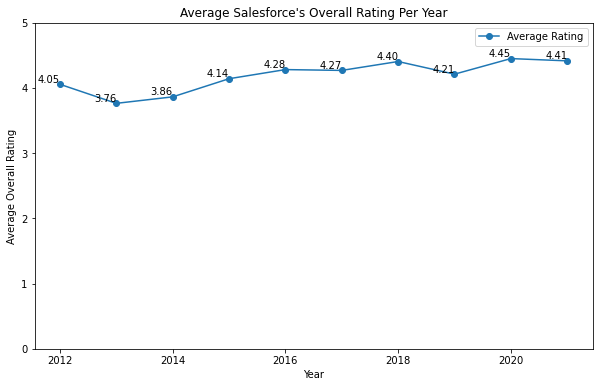

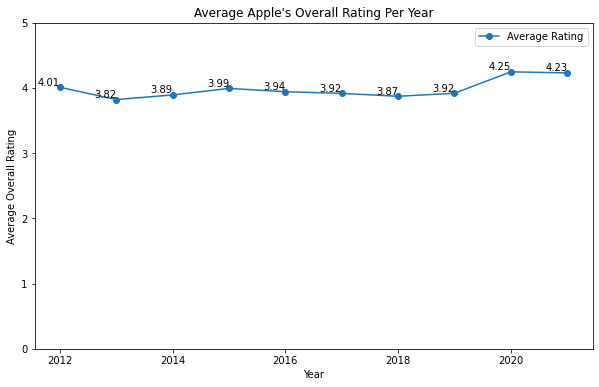

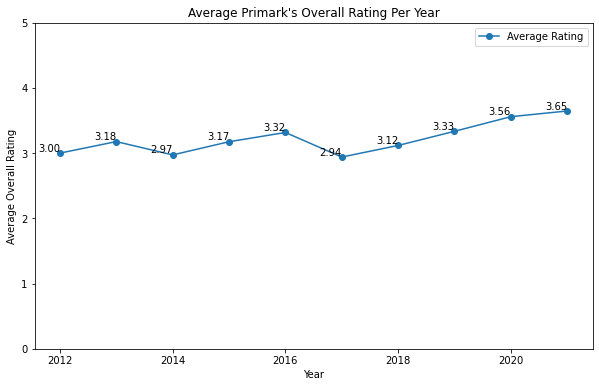

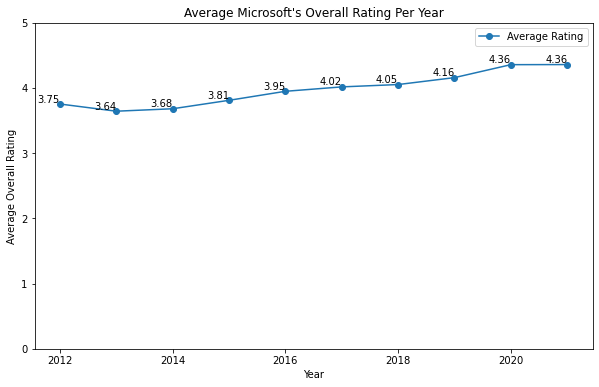

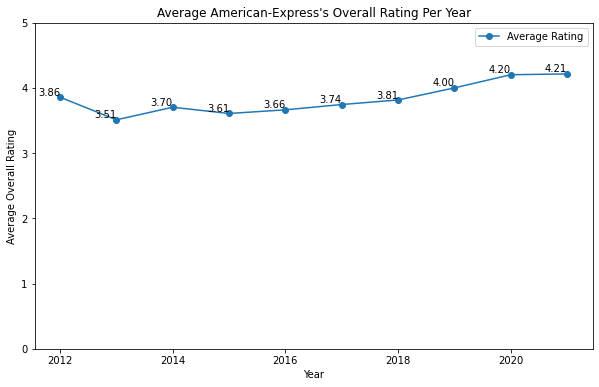

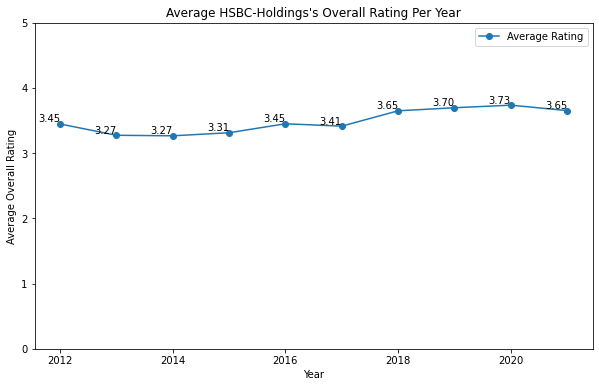

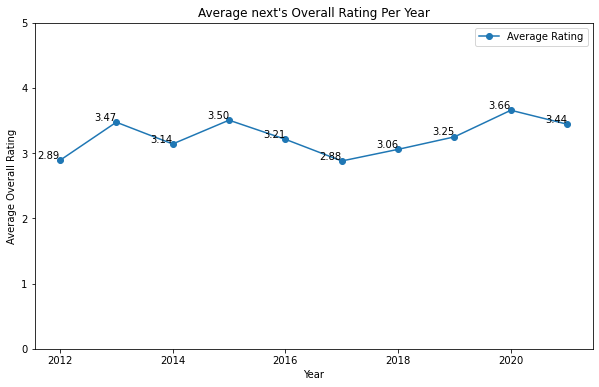

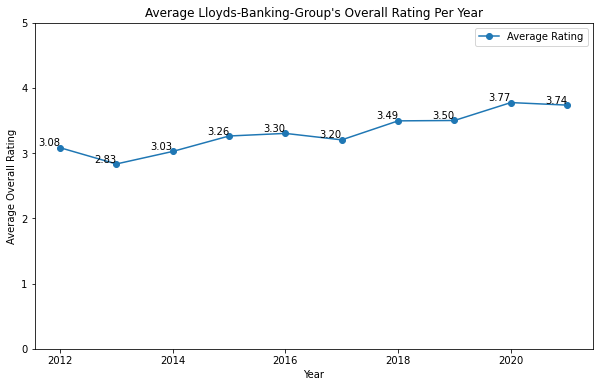

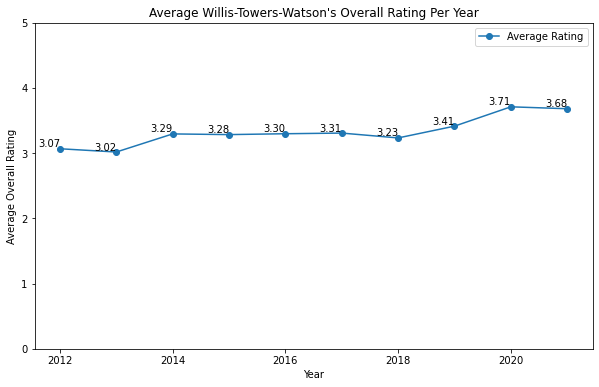

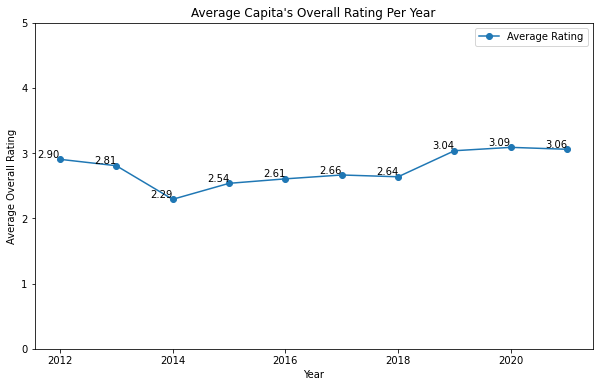

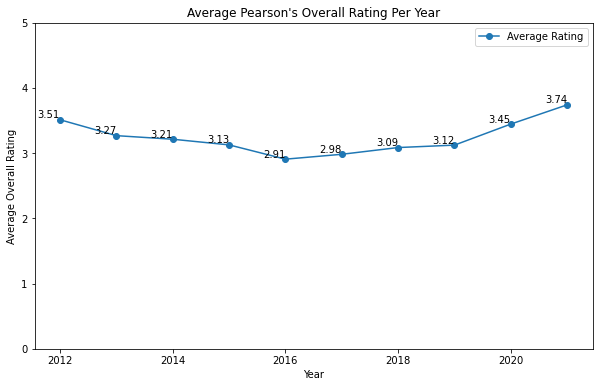

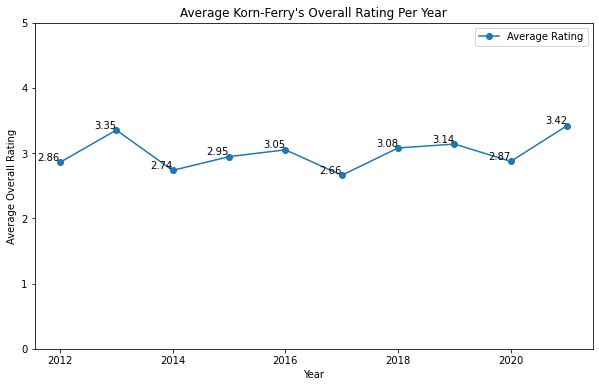

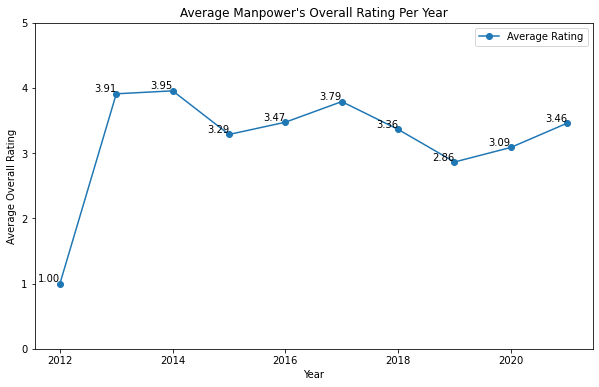

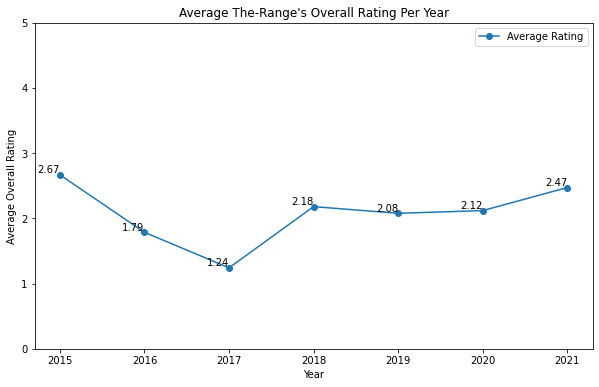

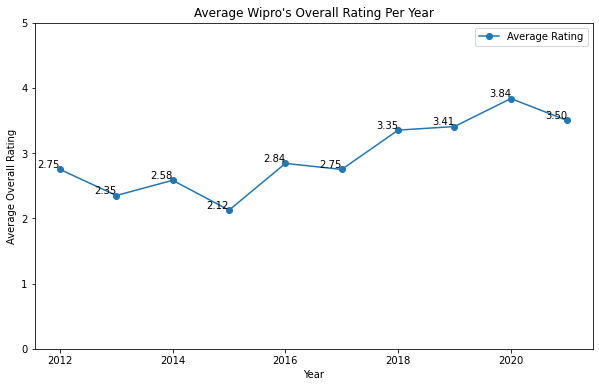

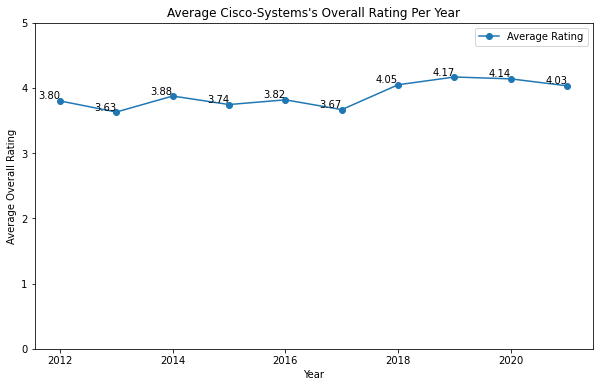

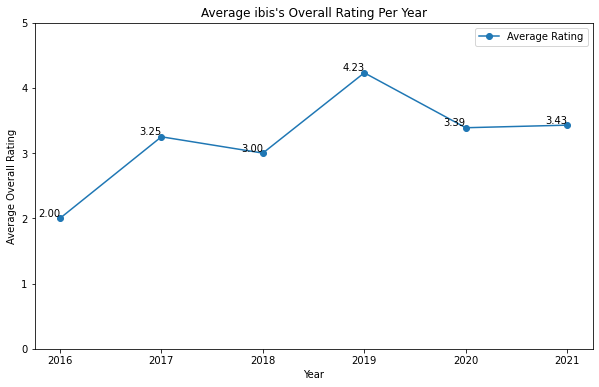

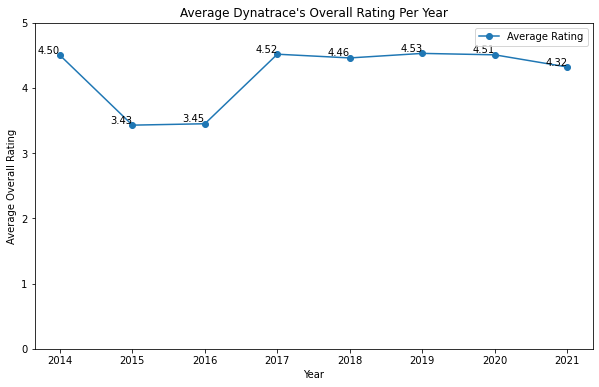

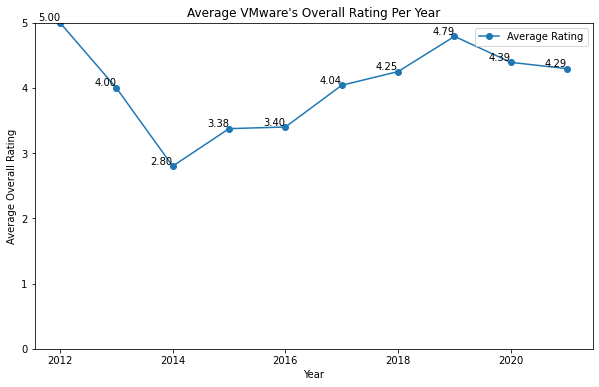

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset outside the loop
file_path = 'kaggle_converted_dates.csv'
kaggle = pd.read_csv(file_path)

# Assuming 'date_review' and 'overall_rating' are the relevant columns
kaggle['date_review'] = pd.to_datetime(kaggle['date_review'])

firm_list = kaggle.firm.unique()

for firm in firm_list:
    # Select data for the current firm
    firm_data = kaggle[kaggle['firm'] == firm]

    # Group by year and calculate the average overall rating for each year
    average_ratings = firm_data.groupby(firm_data['date_review'].dt.year)['overall_rating'].mean()

    # Plot the time series for average overall ratings
    plt.figure(figsize=(10, 6))
    plt.plot(average_ratings.index, average_ratings.values, marker='o', linestyle='-', label='Average Rating')
    plt.title("Average " + firm + "'s Overall Rating Per Year")
    plt.xlabel('Year')
    plt.ylabel('Average Overall Rating')
    plt.ylim(0, 5)

    # Label each data point with the corresponding average rating
    for year, rating in zip(average_ratings.index, average_ratings.values):
        plt.text(year, rating, f'{rating:.2f}', ha='right', va='bottom')

    plt.legend()
    plt.show()


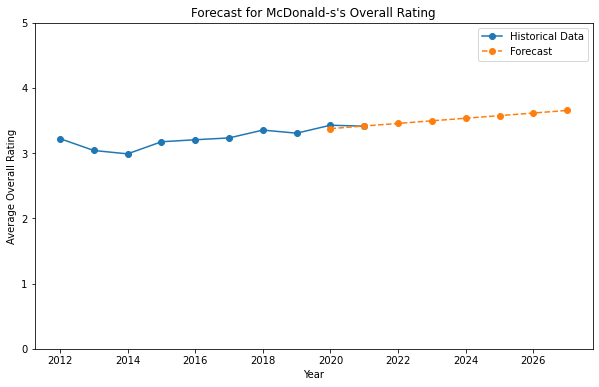

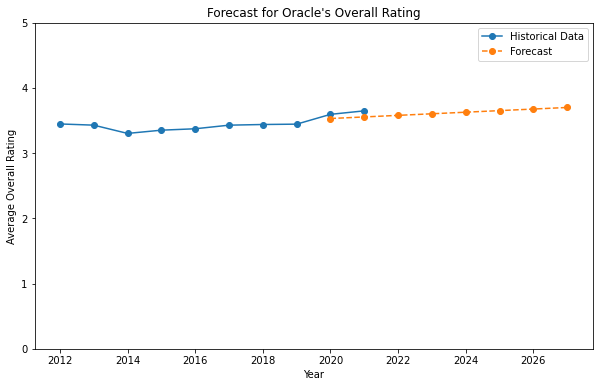

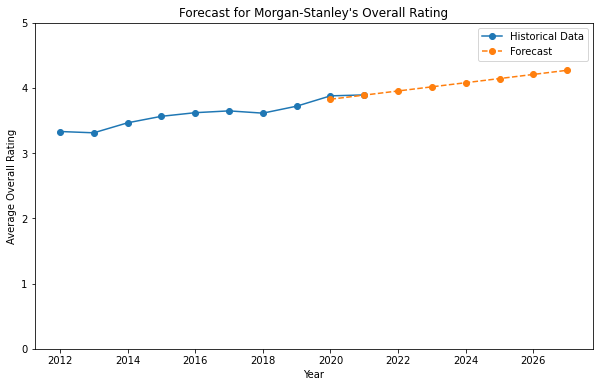

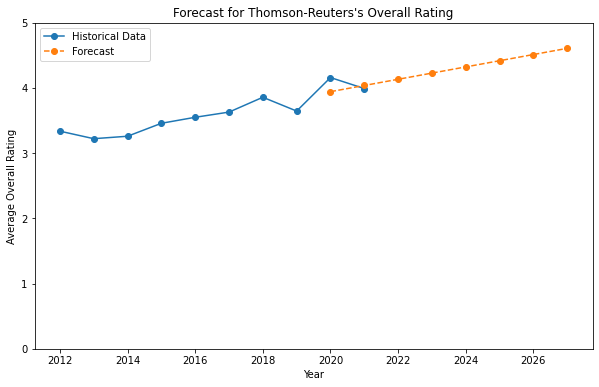

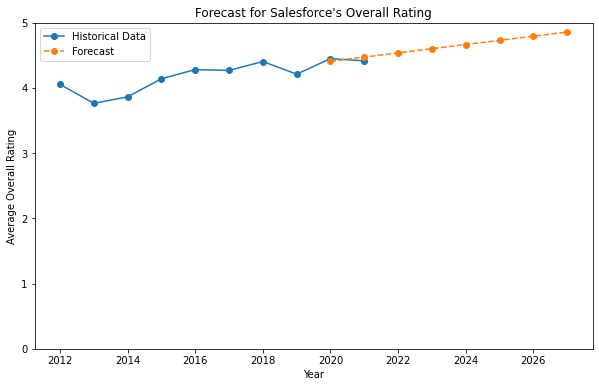

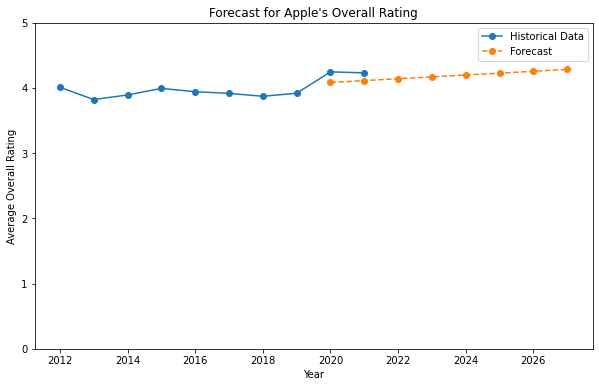

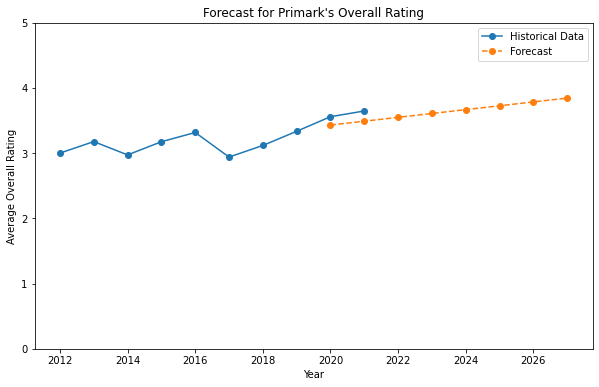

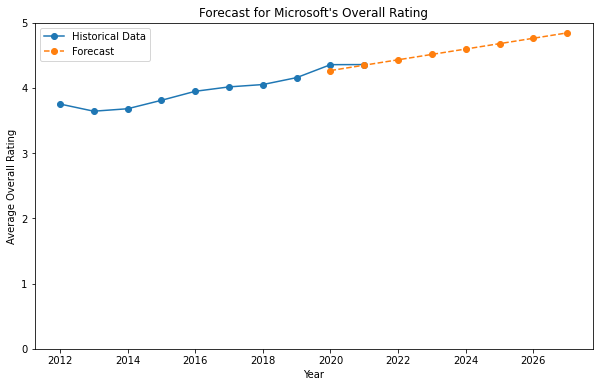

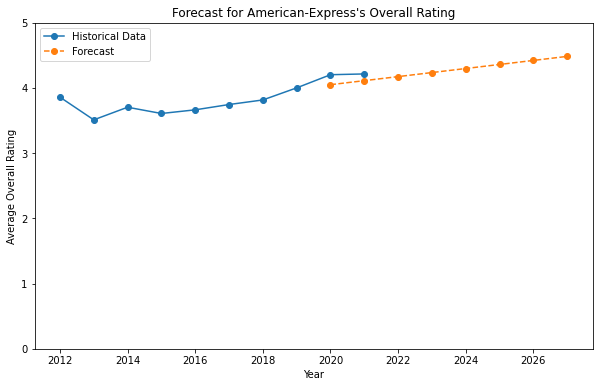

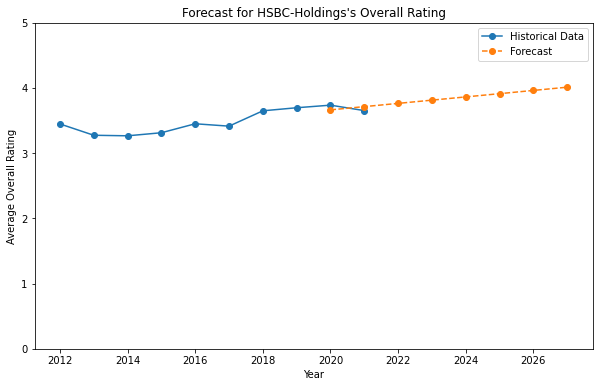

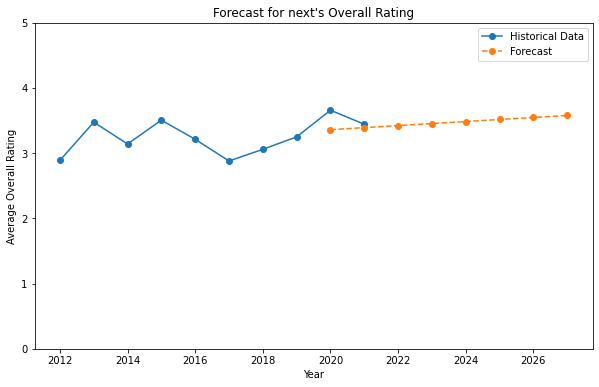

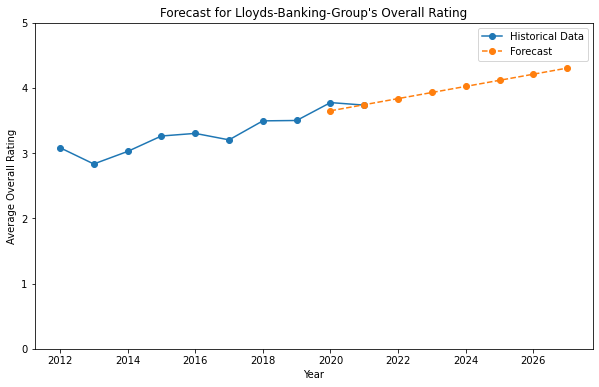

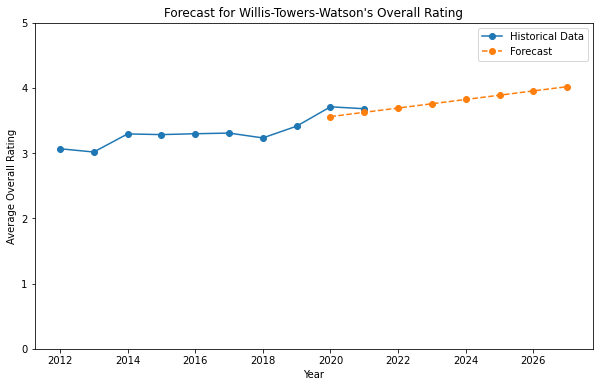

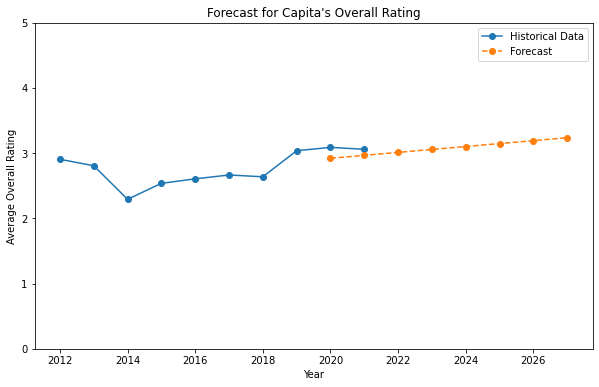

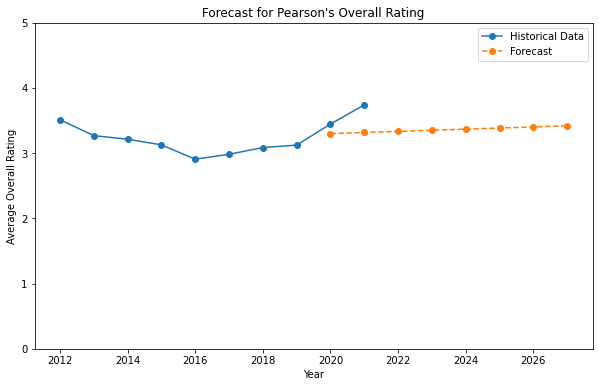

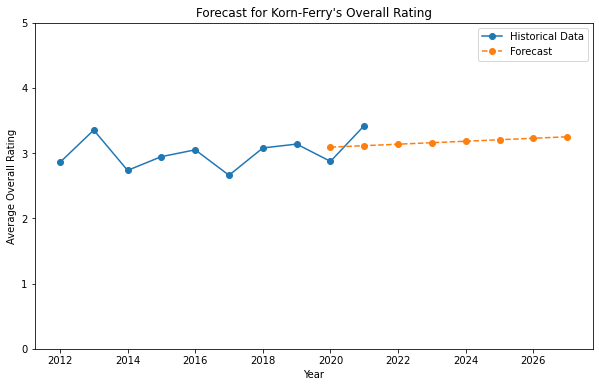

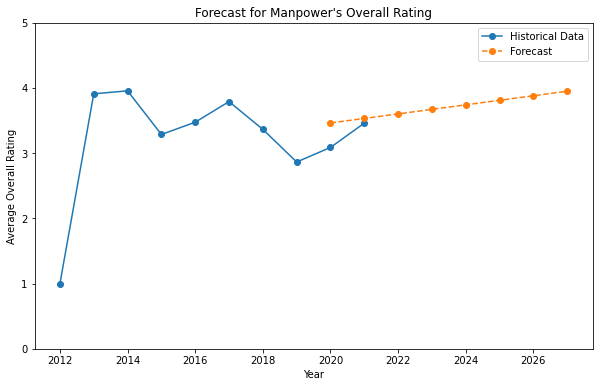

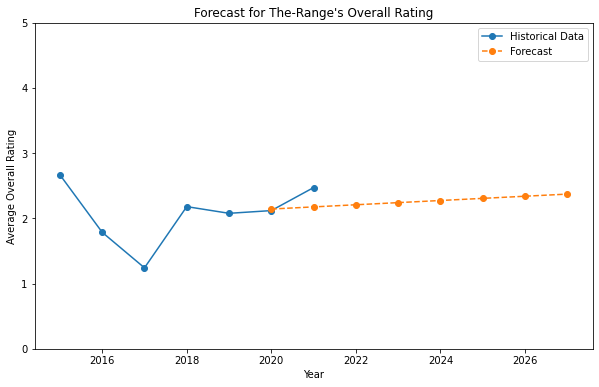

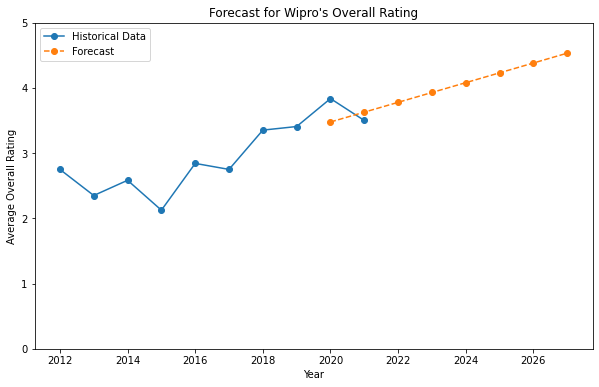

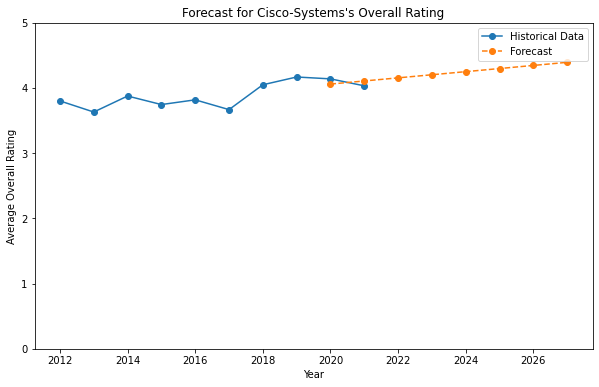

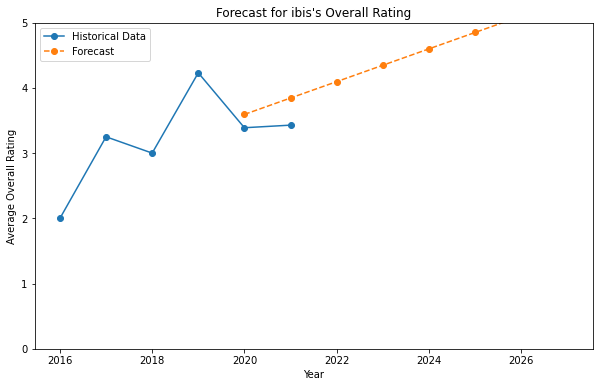

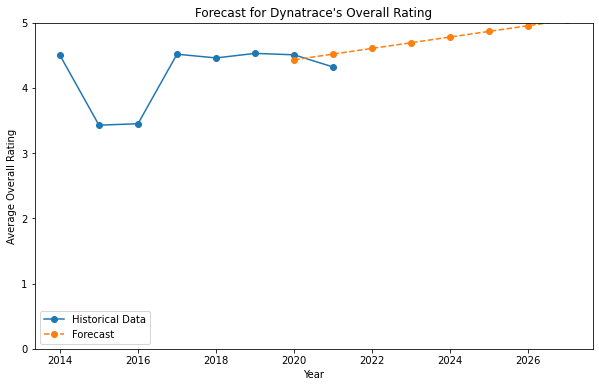

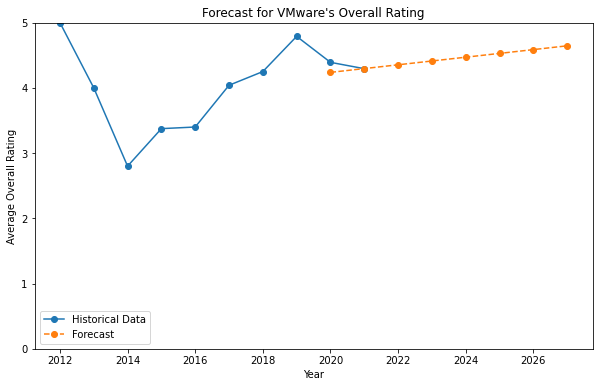

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the dataset outside the loop
file_path = 'kaggle_converted_dates.csv'
kaggle = pd.read_csv(file_path)

# Assuming 'date_review' and 'overall_rating' are the relevant columns
kaggle['date_review'] = pd.to_datetime(kaggle['date_review'])

firm_list = kaggle.firm.unique()

for firm in firm_list:
    # Select data for the current firm
    firm_data = kaggle[kaggle['firm'] == firm]

    # Group by year and calculate the average overall rating for each year
    average_ratings = firm_data.groupby(firm_data['date_review'].dt.year)['overall_rating'].mean().reset_index()

    # Linear regression model
    model = LinearRegression()
    
    X = average_ratings[['date_review']]
    y = average_ratings['overall_rating']

    # Fit the model
    model.fit(X, y)

    # Create a DataFrame with future dates
    future_years = pd.DataFrame({'date_review': range(2020, 2028)})  # Adjust the range as needed

    # Predict future ratings
    future_years['overall_rating'] = model.predict(future_years[['date_review']])

    # Plot the forecast and historical data
    plt.figure(figsize=(10, 6))
    plt.plot(average_ratings['date_review'], average_ratings['overall_rating'], marker='o', linestyle='-', label='Historical Data')
    plt.plot(future_years['date_review'], future_years['overall_rating'], marker='o', linestyle='--', label='Forecast')
    plt.title("Forecast for " + firm + "'s Overall Rating")
    plt.xlabel('Year')
    plt.ylabel('Average Overall Rating')
    plt.ylim(0, 5)
    plt.legend()
    plt.show()

  



